# A simple time series model in Pastas
*R.A. Collenteur, M. Bakker, R. Calje*

This notebook supports the PICO-presentation that will be given at the 2019 EGU General Assembly in Wien, Austria.

Collenteur, R., Bakker, M. and Calje, R. (2019) *Hydrogeological time series analysis using scripts: objective and reproducible criteria for model construction*. Geophysical Research Abstracts, Vol 21, EGU2019-15091.


### 1. Import the Pandas and Pastas packages

In [1]:
import pastas as ps
import pandas as pd

import matplotlib.pyplot as plt

### 2. Read the time series

In [2]:
heads = pd.read_csv("data/heads.csv", index_col="Date", parse_dates=True)
rain = pd.read_csv("data/rain.csv", index_col="Date", parse_dates=True)
evap = pd.read_csv("data/evap.csv", index_col="Date", parse_dates=True)
river = pd.read_csv("data/riverlevel.csv", index_col="Date", parse_dates=True)

### 3. Create the model

In [3]:
ml = ps.Model(heads, name="model", log_level="ERROR")

### 4. Add stressmodel

In [4]:
rm = ps.RechargeModel(rain, evap, rfunc=ps.Gamma, name="recharge")
ml.add_stressmodel(rm)

### 5. Solve and plot the model results

Model Results model                Fit Statistics
nfev     30                     EVP         77.36
nobs     350                    R2           0.77
noise    1                      RMSE         0.13
tmin     2002-01-01 00:00:00    AIC          9.51
tmax     2008-01-01 00:00:00    BIC         32.66
freq     D                      ___              
warmup   3650                   ___              
solver   LeastSquares           ___              

Parameters (6 were optimized)
                optimal   stderr     initial vary
recharge_A   453.589152   ±5.99%  173.640151    1
recharge_n     0.971952   ±2.89%    1.000000    1
recharge_a   101.085238  ±10.03%   10.000000    1
recharge_f    -0.890138   ±3.51%   -1.000000    1
constant_d   258.542852   ±0.01%  258.767061    1
noise_alpha   10.581824   ±9.44%   14.000000    1


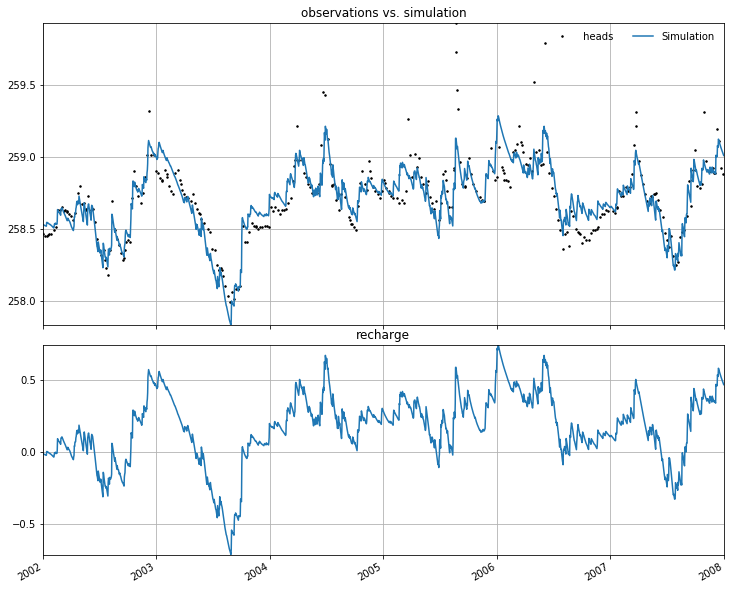

In [5]:
tmin="2002"
tmax="2008"

ml.solve(tmin=tmin, tmax=tmax)
ml.plots.decomposition(ytick_base=0.5)
sim = ml.simulate()
rch = ml.get_contribution("recharge")

### 6. Add a stressmodel for the river

Model Results model                Fit Statistics
nfev     41                     EVP         87.03
nobs     350                    R2           0.87
noise    1                      RMSE         0.10
tmin     2002-01-01 00:00:00    AIC         14.36
tmax     2008-01-01 00:00:00    BIC         45.22
freq     D                      ___              
warmup   3650                   ___              
solver   LeastSquares           ___              

Parameters (8 were optimized)
                optimal   stderr     initial vary
recharge_A   323.576145   ±6.50%  173.640151    1
recharge_n     1.109917   ±4.11%    1.000000    1
recharge_a    87.796177  ±10.26%   10.000000    1
recharge_f    -1.066618   ±3.95%   -1.000000    1
river_A        0.511626   ±6.11%    3.705340    1
river_a        1.510469   ±9.21%   10.000000    1
constant_d   258.554024   ±0.01%  258.767061    1
noise_alpha    9.945339   ±9.58%   14.000000    1


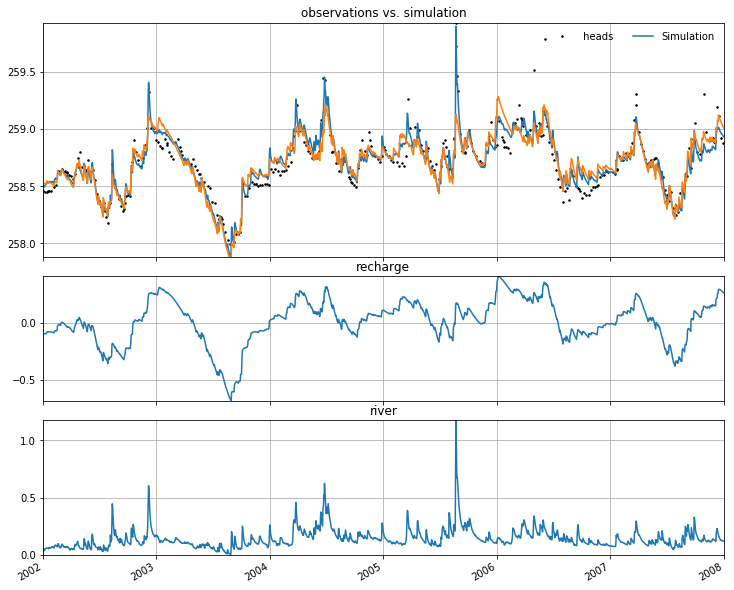

In [6]:
sm = ps.StressModel(river, rfunc=ps.Exponential, name="river", settings="waterlevel")
sm.update_stress(norm="min")
ml.add_stressmodel(sm)
ml.solve(tmin=tmin, tmax=tmax)
axes = ml.plots.decomposition(ytick_base=0.5)
axes[0].plot(sim)

# Make plots for presentation

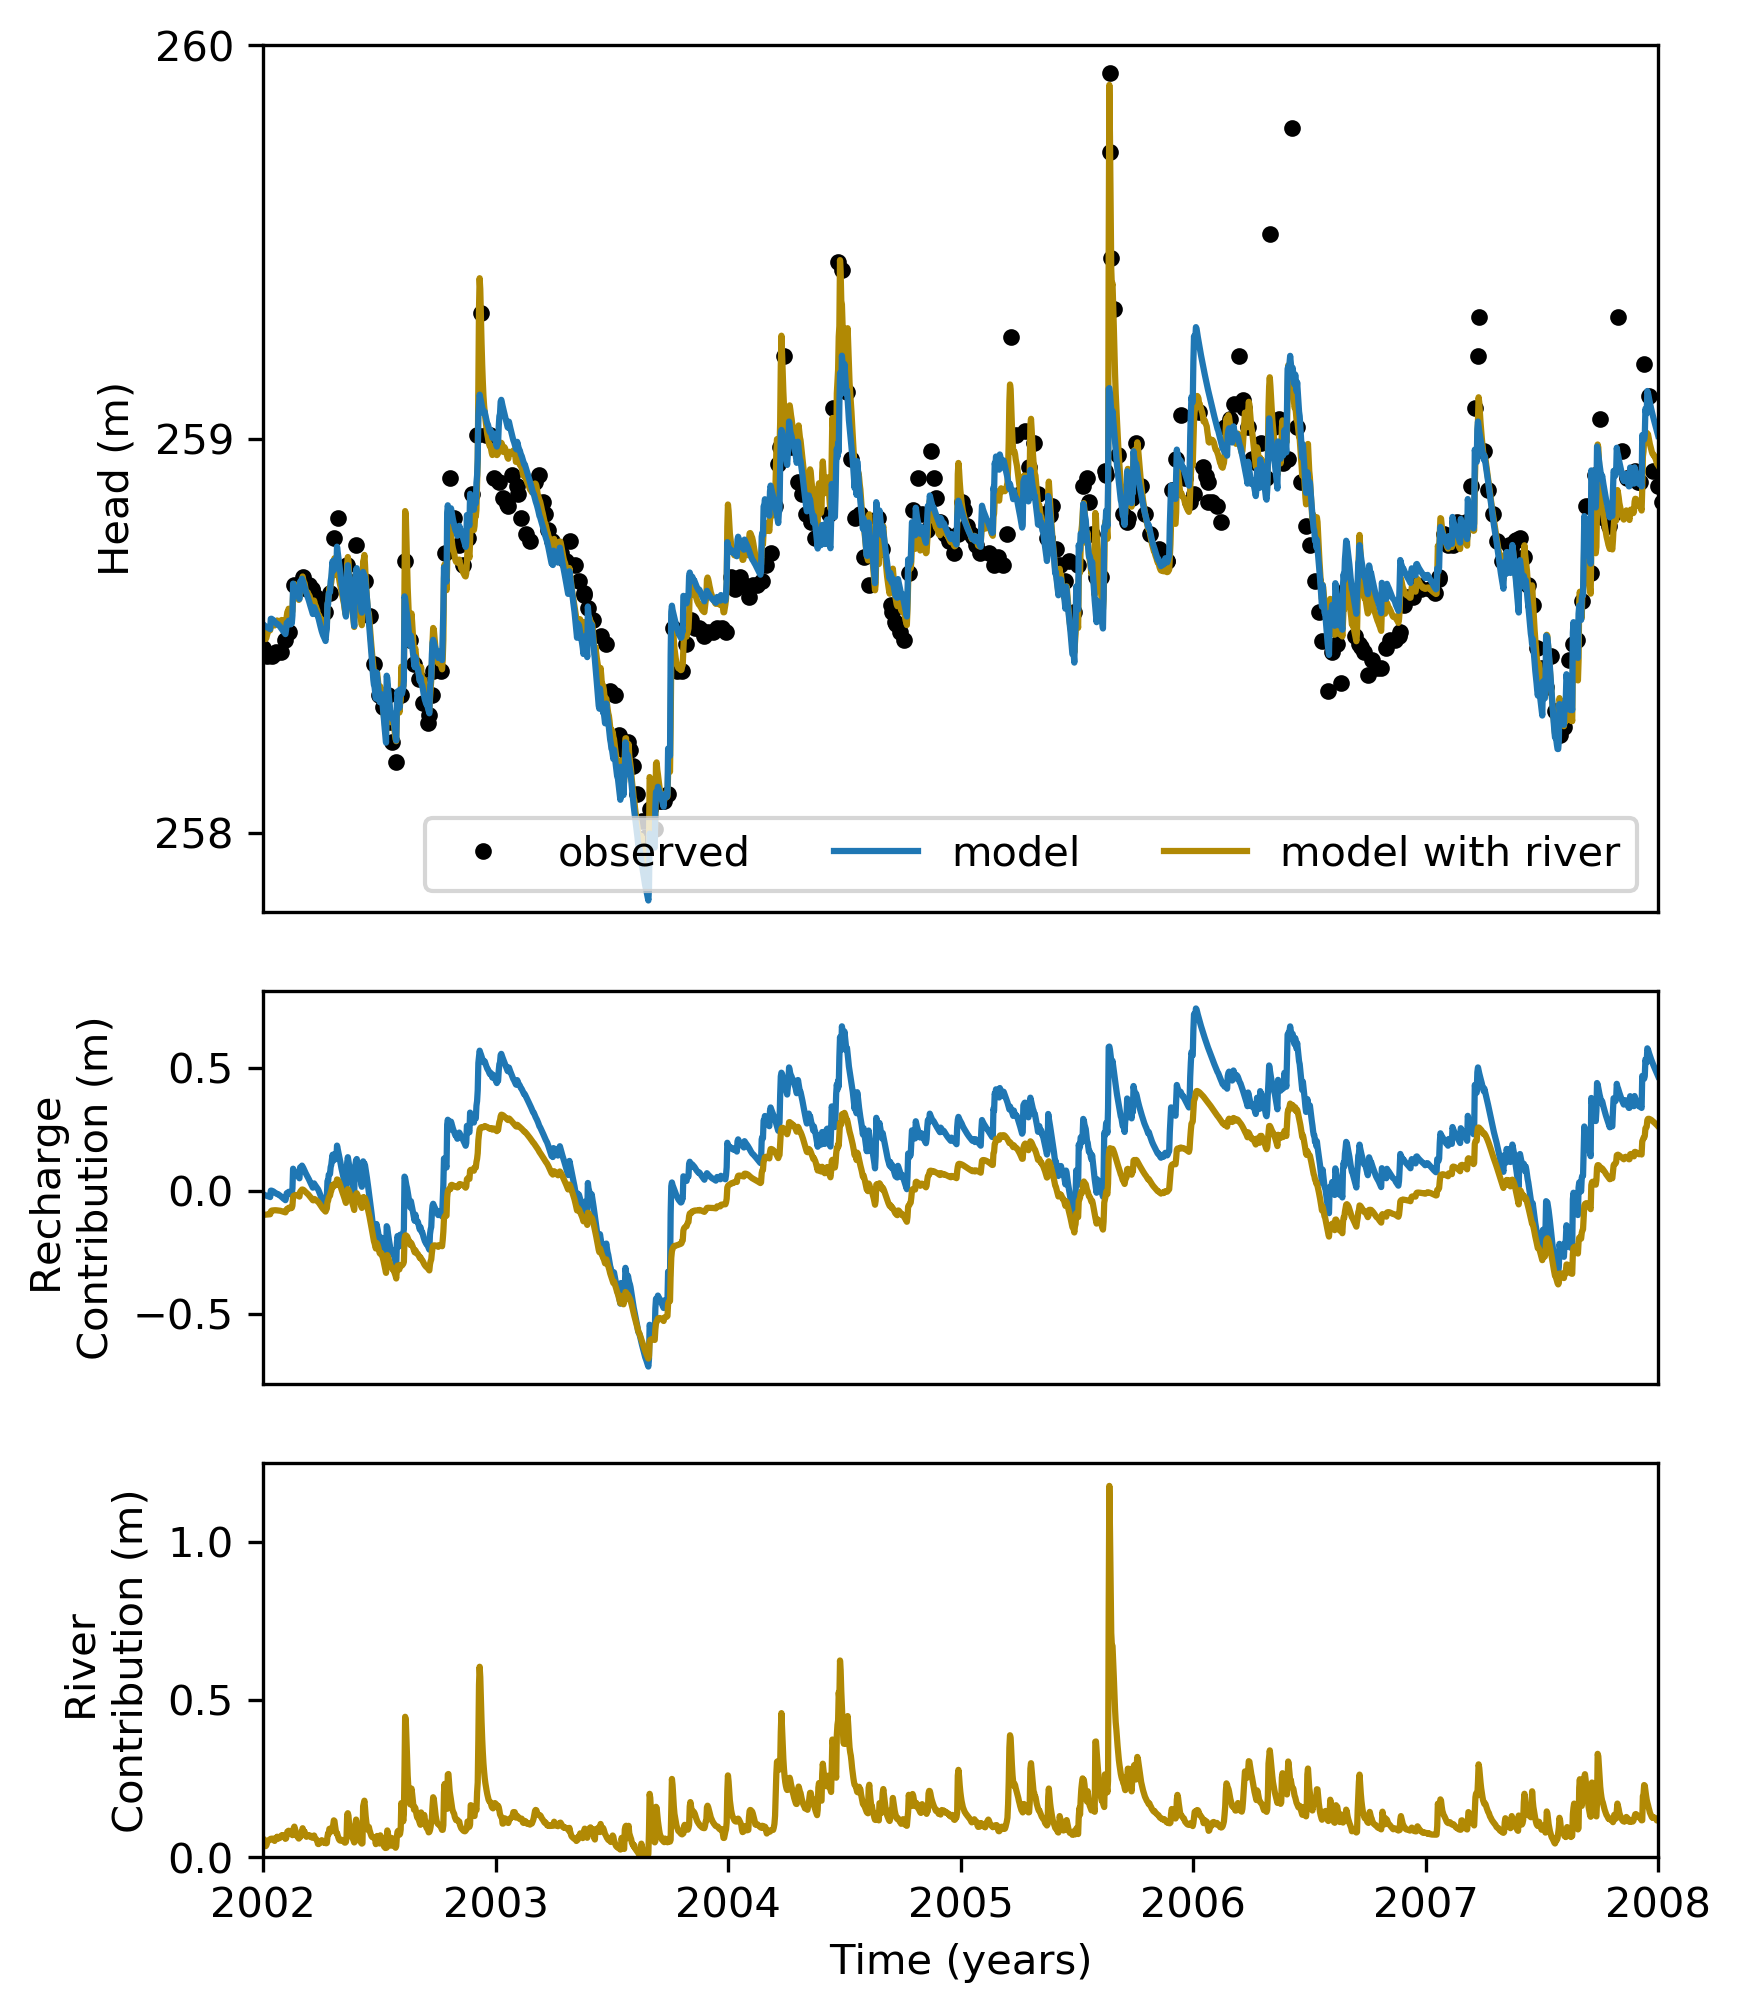

In [7]:
plt.figure(figsize=(6,8), dpi=300)
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=2)
ax1.plot(heads, marker=".", color="k", linestyle=" ", zorder=0)
ax1.set_yticks([258, 259, 260])
ax1.set_ylabel(" \nHead (m)")
ax1.set_xlim(tmin,tmax)
ax1.set_ylim(257.8, 260)
ax1.set_xlabel("Time (years)")
plt.savefig("figure1.eps", bbox_inches="tight", dpi=300)

ax1.set_xticks([])
ax1.plot(sim)
ax2 = plt.subplot2grid((4,4), (2,0), colspan=4, rowspan=1)
ax1.legend(["observed", "model"], loc=4, ncol=3)
ax2.set_ylabel("Recharge \nContribution (m)")
ax2.plot(rch)
ax2.set_xlim(tmin,tmax)
ax1.set_xlabel("")
ax2.set_xlabel("Time (years)")
plt.savefig("figure2.eps", bbox_inches="tight")

ax2.set_xticks([])
ax3 = plt.subplot2grid((4,4), (3,0), colspan=4, rowspan=1)
ax1.plot(ml.simulate(), zorder=1, color="#B18904")
ax1.legend(["observed", "model", "model with river"], loc=4, ncol=3)
ax2.plot(ml.get_contribution("recharge"), color="#B18904")
ax3.plot(ml.get_contribution("river"), color="#B18904")
ax3.set_ylabel("River \nContribution (m)")
ax3.set_ylim(0, 1.25)
ax3.set_yticks([0.0, 0.5, 1.0])
ax2.set_xlabel("")
ax3.set_xlabel("Time (years)")
plt.xlim(tmin,tmax)
plt.savefig("figure3.eps", bbox_inches="tight")

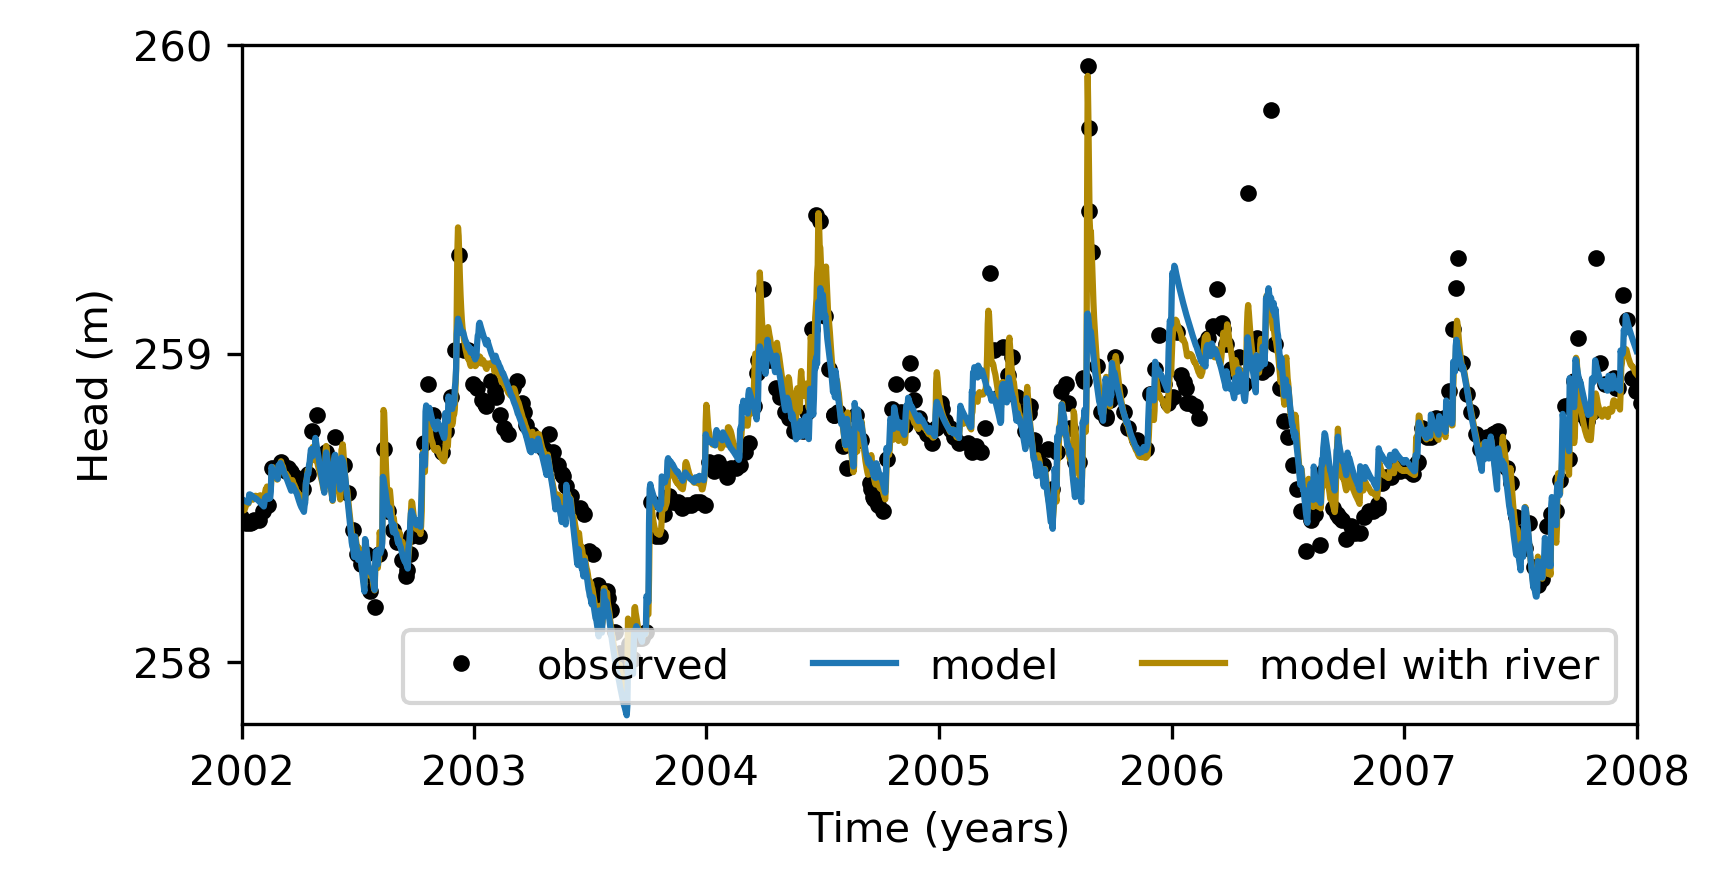

In [8]:
plt.figure(figsize=(6,3), dpi=300)
ax1 = plt.subplot()
ax1.plot(heads, marker=".", color="k", linestyle=" ", zorder=0)
ax1.plot(sim)
ax1.plot(ml.simulate(), zorder=1, color="#B18904")
ax1.legend(["observed", "model", "model with river"], loc=4, ncol=3)
ax1.set_yticks([258, 259, 260])
ax1.set_ylabel(" \nHead (m)")
ax1.set_xlim(tmin,tmax)
ax1.set_ylim(257.8, 260)
ax1.set_xlabel("Time (years)")
plt.savefig("figure4.eps", bbox_inches="tight")